Problem Statement:

Given the historical loan , the objective is to build a machine learning model to predict whether a loan application will be approved or not. The goal is to analyze various applicant and loan-related attributes to determine the key factors that influence loan approval decisions and use these insights to make more informed lending decisions, minimize risk, and improve financial stability. The target variable is typically the loan approval status, which indicates whether a loan is approved (1) or not (0).

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score


Objective Summary:

The Loan Data dataset contains various features related to loan applicants and their loan applications. The main goal is to develop a predictive model that can accurately determine whether a loan application will be approved based on these features. By analyzing the dataset, we aim to identify key factors influencing loan approval decisions and enhance the decision-making process for financial institutions, thereby minimizing risk and improving financial stability.

Target:

The target variable in this dataset is the loan approval status, which indicates whether a loan is approved (typically labeled as 1 for approved and 0 for not approved).

In [ ]:

df = pd.read_csv('loan_data.csv')
df


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# provides a summary of the dataset including data types and non-null count

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Descriptive Statistics

In [ ]:

df.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:

df.isnull().sum()


,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:

df.duplicated().sum()


0

LabelEncoder

Purpose: This document explains how to use the LabelEncoder class from the sklearn.preprocessing module to convert categorical data into numerical format.

In [ ]:

le = LabelEncoder()

df['person_gender']                  = le.fit_transform(df['person_gender'])
df['person_education']               = le.fit_transform(df['person_education'])
df['person_home_ownership']          = le.fit_transform(df['person_home_ownership'])
df['loan_intent']                    = le.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])



# Data Visualization
Create histograms for all numerical columns to understand the distributia.

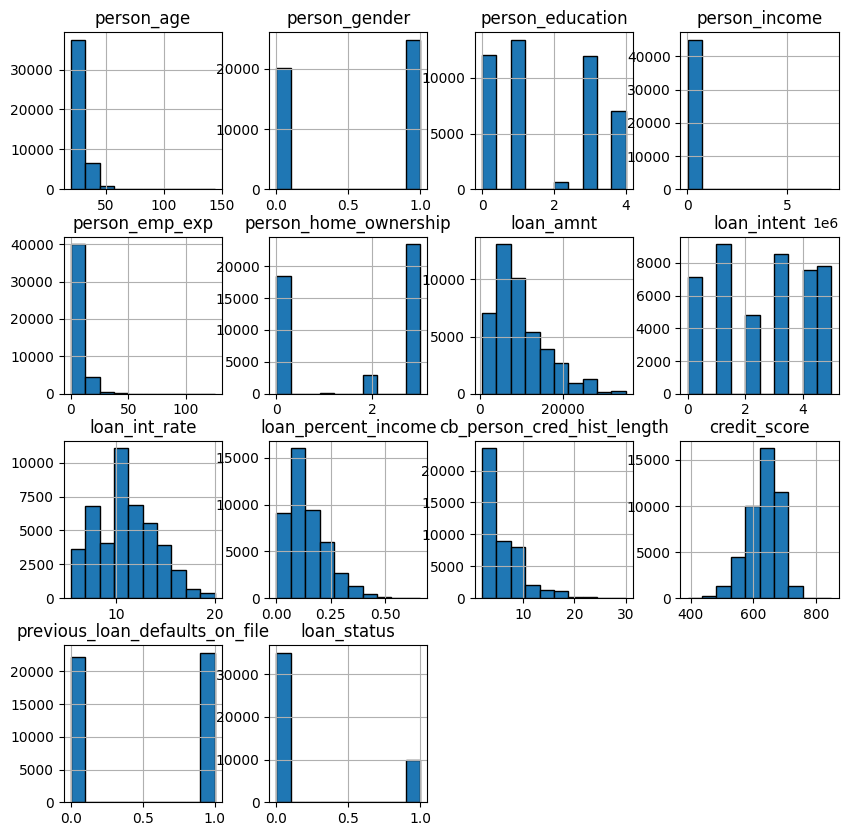

In [ ]:

df.hist(edgecolor = 'k', figsize = (10, 10))

plt.show()


# Correlation Analysis
A heatmap was generated to understand the correlation between different features:


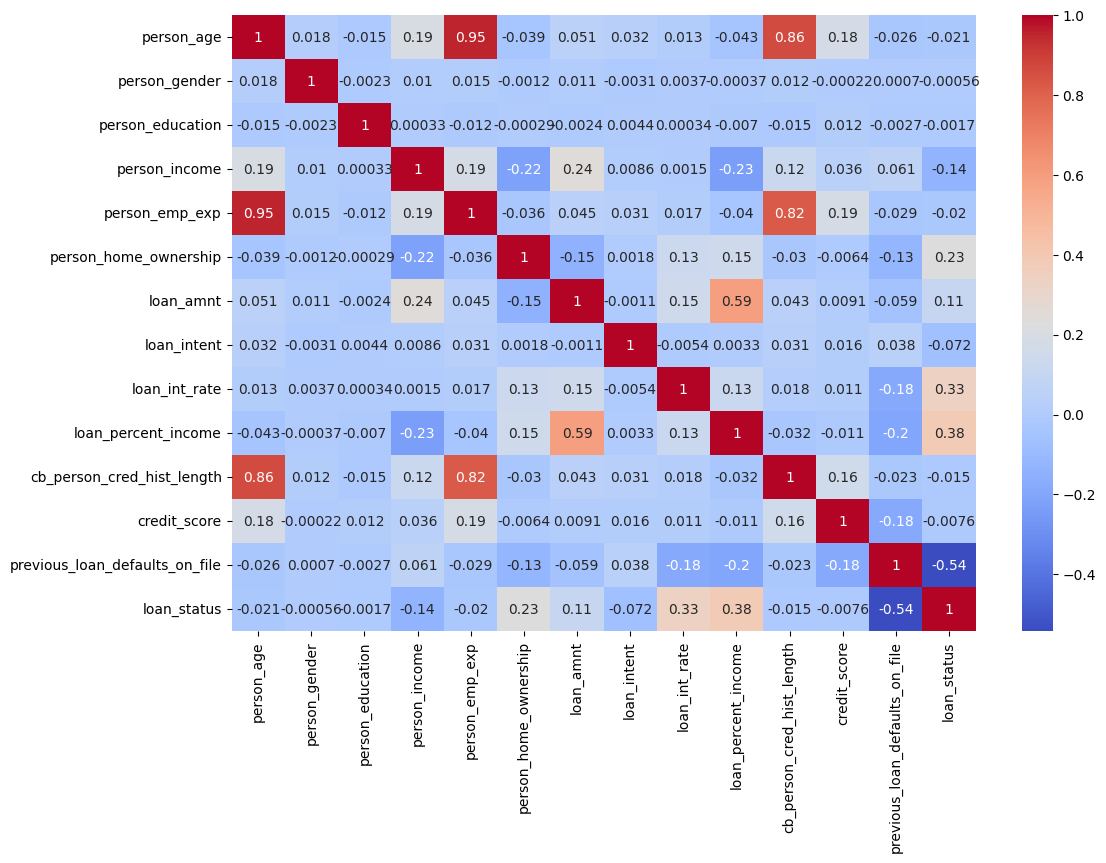

In [ ]:

x = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(x, annot = True, cmap = 'coolwarm')

plt.show()


# Feature selection
Low-correlation features and those with high skewness were dropped from the dataset:


In [ ]:

df.drop(columns = ['person_age'],                 inplace = True, axis = 1)
df.drop(columns = ['person_gender'],              inplace = True, axis = 1)
df.drop(columns = ['person_education'],           inplace = True, axis = 1)
df.drop(columns = ['person_emp_exp'],             inplace = True, axis = 1)
df.drop(columns = ['loan_intent'],                inplace = True, axis = 1)
df.drop(columns = ['cb_person_cred_hist_length'], inplace = True, axis = 1)
df.drop(columns = ['credit_score'],               inplace = True, axis = 1)


In [ ]:

df.columns


Index(['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

# Plot Correlation Heatmap

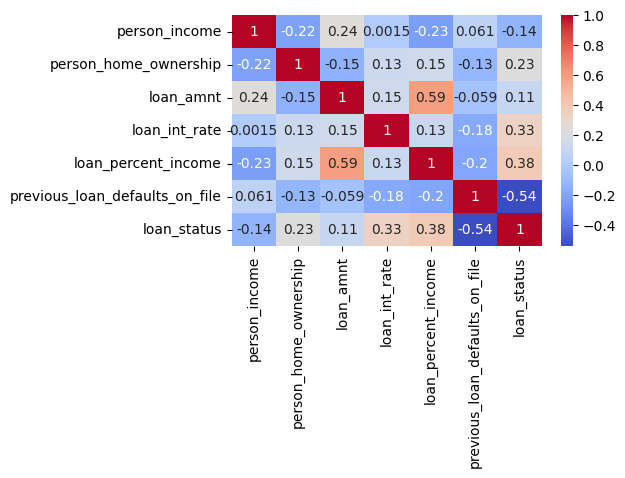

In [ ]:

x = df.corr()
plt.figure(figsize = (5, 3))
sns.heatmap(x, annot = True, cmap = 'coolwarm')

plt.show()


#Box Plot Visualization

This document explains how to create a series of box plots for a DataFrame using the plot method in pandas, with subplots arranged in a specified layout.

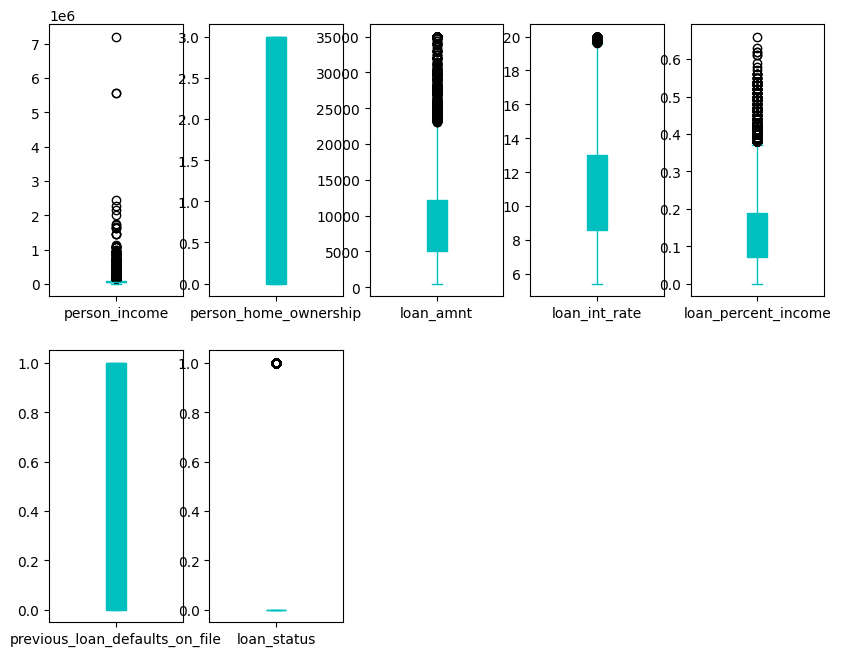

In [ ]:

df.plot(kind = 'box', subplots = True, layout = (3, 5), figsize = (10, 12), color = 'c', patch_artist = True)

plt.show()



#Handling Skewness:

Skewness is handled by applying a log transformation to the data

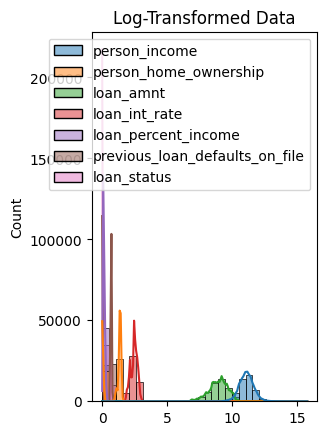

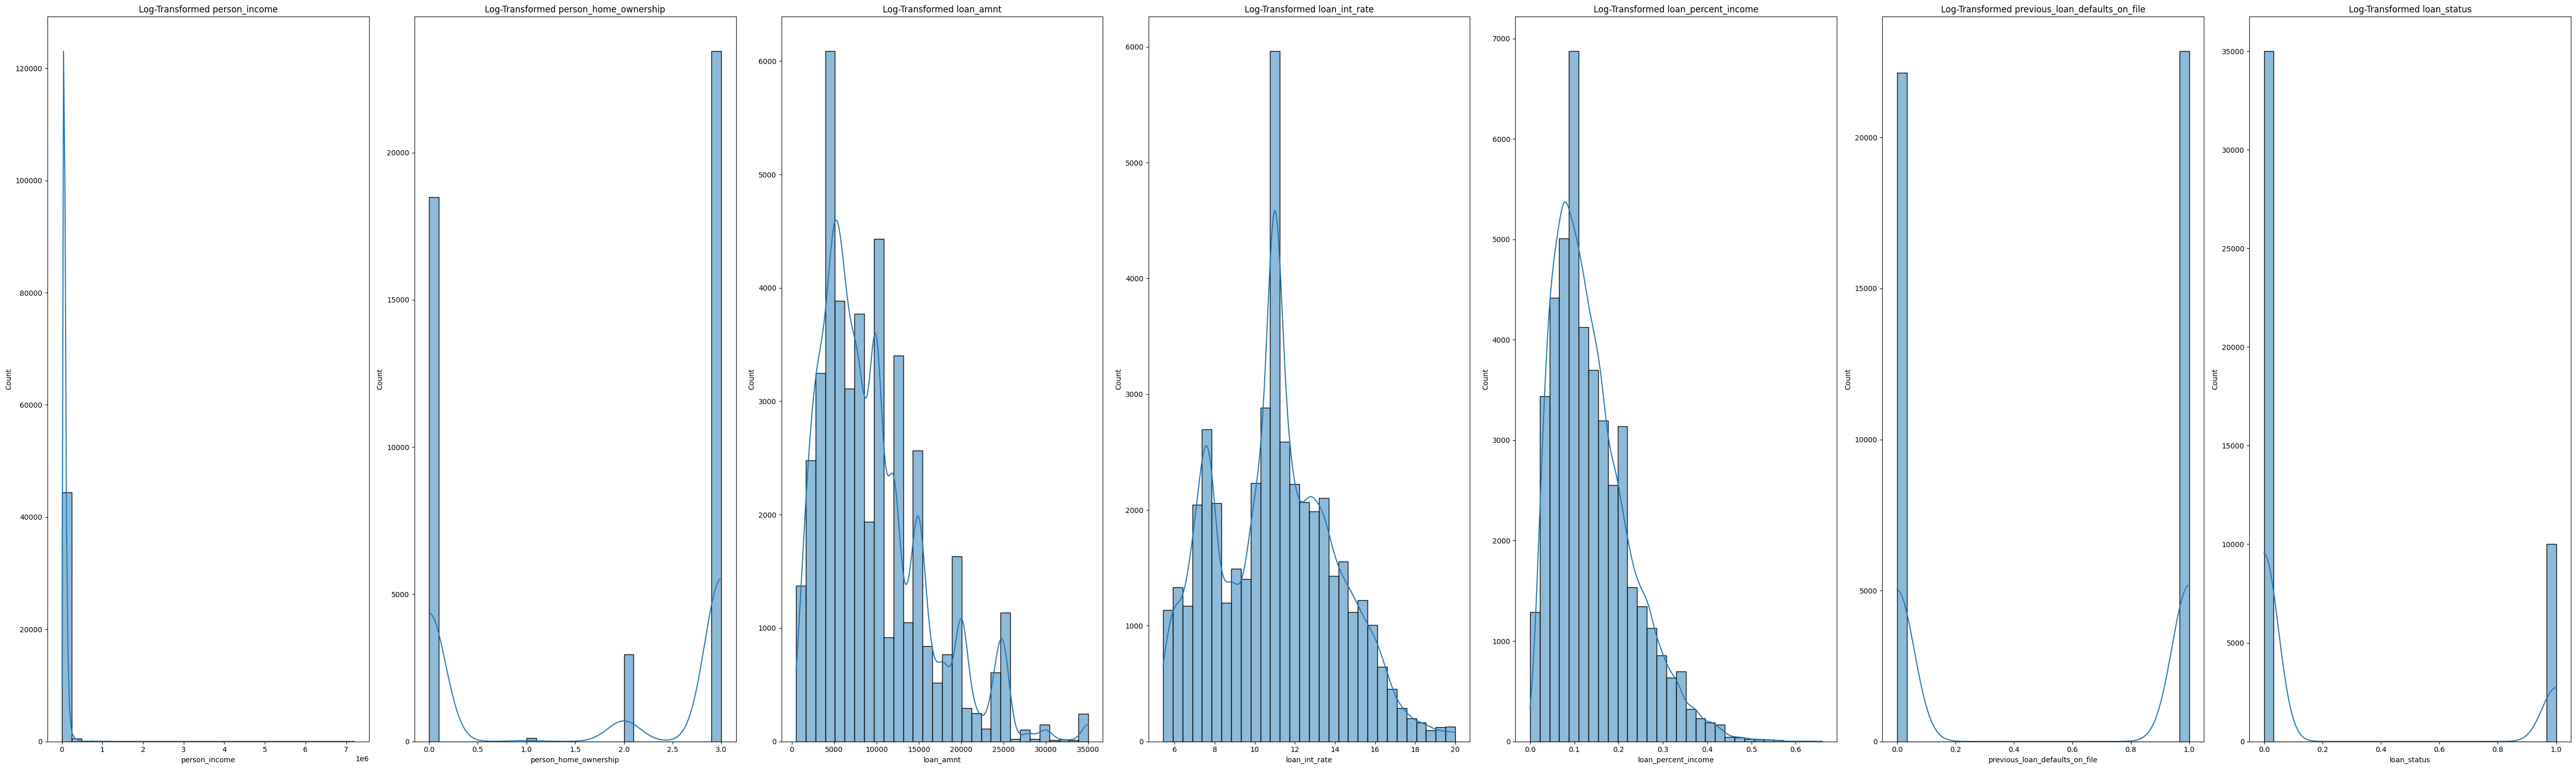

In [ ]:

data = np.log(df+1)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins = 30, kde = True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming df is a DataFrame with multiple features
num_features = df.shape[1]      # Number of features
plt.figure(figsize = (50, 15))  # Adjust the figure size as needed

for i, column in enumerate(df.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()

plt.show()


# Feature and Target Selection
Features were selected for modeling


In [ ]:

data['loan_status'] = (data['loan_status'] > 0.5).astype(int)

x = data[['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']]
y = data['loan_status']


#Now perform the train-test split

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


#Model Training

In [ ]:

model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

#Predictions
The model was used to predict target based on user inputs for pollutant levels

In [ ]:

y_pred = model.predict(x_test)
y_pred


array([0, 0, 1, ..., 0, 1, 0])

In [ ]:

print("Accuracy:",  accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average = "weighted"))
print('Recall:',    recall_score(y_test, y_pred, average    = "weighted"))
print('F1 Score:',  f1_score(y_test, y_pred, average        = "weighted"))


Accuracy: 0.9205555555555556
Precision: 0.9189607153799014
Recall: 0.9205555555555556
F1 Score: 0.9193346657121585


In [ ]:

df.head()


,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,71948.0,3,35000.0,16.02,0.49,0,1
1,12282.0,2,1000.0,11.14,0.08,1,0
2,12438.0,0,5500.0,12.87,0.44,0,1
3,79753.0,3,35000.0,15.23,0.44,0,1
4,66135.0,3,35000.0,14.27,0.53,0,1


In [ ]:

person_income                  = float(input("Enter person_income : "))
person_home_ownership          = float(input("Enter person_home_ownership : "))
loan_amnt                      = float(input("Enter loan_amnt : "))
loan_int_rate                  = float(input("Enter loan_int_rate : "))
loan_percent_income            = float(input("Enter loan_percent_income : "))
previous_loan_defaults_on_file = float(input("Enter previous_loan_defaults_on_file : "))

user_input = [[person_income, person_home_ownership, loan_amnt, loan_int_rate, loan_percent_income, previous_loan_defaults_on_file]]

loan_status = model.predict(user_input)
print("loan_status : ",loan_status)


Enter person_income : 66135.0
Enter person_home_ownership : 3
Enter loan_amnt : 35000.0
Enter loan_int_rate : 14.27
Enter loan_percent_income : 0.53
Enter previous_loan_defaults_on_file : 0
loan_status :  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
